This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[1]

0

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
type(word_index)

dict

In [ ]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
vals = word_index.values()

In [ ]:
max(vals)

88584

In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

**Decoding reviews back to text**

In [ ]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[20000]])

In [ ]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [ ]:
decoded_review

'? a young woman suffers from the ? that she is a werewolf based upon a family legend of an ? accused of and killed for allegedly being one due to her past treatment by men she travels the countryside ? and killing the men she meets falling in love with a kind man her life appears to take a turn for the better when she is raped and her lover is killed by a band of thugs traumatized again by these latest events the woman returns to her violent ways and seeks revenge on the thugs according to the dvd ? synopsis br br ? ? ? la ? ? begins with full frontal ? ? dance by ? blonde ? ? who as ? ? ? believes she is a werewolf the ? part is when the camera catches background fire between her legs the opening flashback reveals her hairy ? was probably a ? creature ms ? is unfortunately not a werewolf she is merely a very strong lunatic br br as a film werewolf woman in english would have been better if ? character really was a female werewolf with her sexual ? a great bit of characterization but 

In [ ]:
train_labels[20000]

0

In [ ]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [ ]:
decoded_review

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train.shape

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
#model.summary()

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 8s 66ms/step - loss: 0.5301 - accuracy: 0.7693 - val_loss: 0.4090 - val_accuracy: 0.8637
Epoch 2/4
30/30 [==============================] - 1s 22ms/step - loss: 0.3369 - accuracy: 0.8933 - val_loss: 0.3230 - val_accuracy: 0.8852
Epoch 3/4
30/30 [==============================] - 1s 23ms/step - loss: 0.2496 - accuracy: 0.9222 - val_loss: 0.2933 - val_accuracy: 0.8827
Epoch 4/4
30/30 [==============================] - 1s 23ms/step - loss: 0.2037 - accuracy: 0.9327 - val_loss: 0.2798 - val_accuracy: 0.8874


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

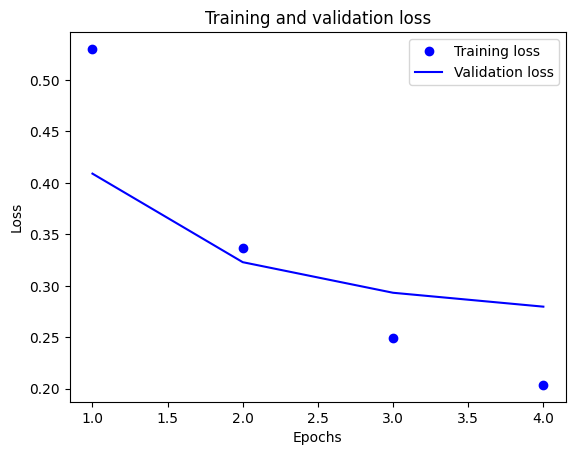

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


**Plotting the training and validation accuracy**

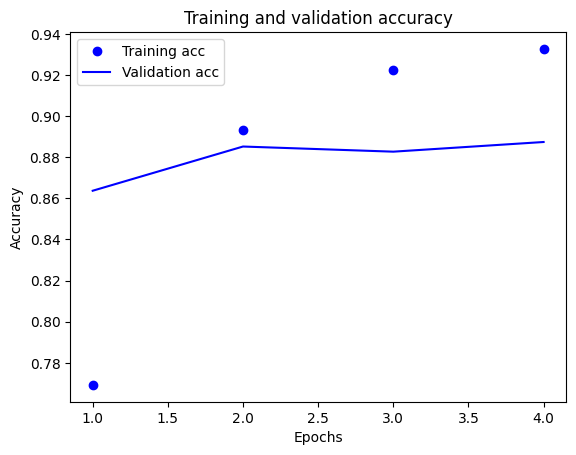

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)

In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.2940 - accuracy: 0.8827


### Further experiments


1.   increase layer neuron size from 16 to 32 and see the impact on perfomance
2.   increase number of layers, add at least two new layers



### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [ ]:
train_data.shape

(8982,)

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
import numpy as np
unique, counts = np.unique(train_labels, return_counts=True)

In [ ]:
result = np.column_stack((unique, counts))

In [ ]:
unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
counts

array([  55,  432,   74, 3159, 1949,   17,   48,   16,  139,  101,  124,
        390,   49,  172,   26,   20,  444,   39,   66,  549,  269,  100,
         15,   41,   62,   92,   24,   15,   48,   19,   45,   39,   32,
         11,   50,   10,   49,   19,   19,   24,   36,   30,   13,   21,
         12,   18])

In [ ]:
result = np.column_stack((unique, counts))

In [ ]:
result

array([[   0,   55],
       [   1,  432],
       [   2,   74],
       [   3, 3159],
       [   4, 1949],
       [   5,   17],
       [   6,   48],
       [   7,   16],
       [   8,  139],
       [   9,  101],
       [  10,  124],
       [  11,  390],
       [  12,   49],
       [  13,  172],
       [  14,   26],
       [  15,   20],
       [  16,  444],
       [  17,   39],
       [  18,   66],
       [  19,  549],
       [  20,  269],
       [  21,  100],
       [  22,   15],
       [  23,   41],
       [  24,   62],
       [  25,   92],
       [  26,   24],
       [  27,   15],
       [  28,   48],
       [  29,   19],
       [  30,   45],
       [  31,   39],
       [  32,   32],
       [  33,   11],
       [  34,   50],
       [  35,   10],
       [  36,   49],
       [  37,   19],
       [  38,   19],
       [  39,   24],
       [  40,   36],
       [  41,   30],
       [  42,   13],
       [  43,   21],
       [  44,   12],
       [  45,   18]])

**Decoding newswires back to text**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 1us/step


In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### Preparing the data

**Encoding the input data**

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
x_train[100]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
train_labels[100]

20

In [ ]:
y_train[100]

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
y_train[12]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Building your model

**Model definition**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 42ms/step - loss: 2.7621 - accuracy: 0.5172 - val_loss: 1.8339 - val_accuracy: 0.6530
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.5105 - accuracy: 0.7028 - val_loss: 1.3822 - val_accuracy: 0.6920
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.1479 - accuracy: 0.7586 - val_loss: 1.1718 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.9296 - accuracy: 0.8072 - val_loss: 1.0815 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.7675 - accuracy: 0.8373 - val_loss: 0.9920 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6369 - accuracy: 0.8646 - val_loss: 0.9436 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5308 - accuracy: 0.8885 - val_loss: 0.9206 - val_accuracy: 0.8050
Epoch 8/20
16

**Plotting the training and validation loss**

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=8,
          batch_size=512)
results = model.evaluate(x_test, y_test)

In [ ]:
results

### Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0]

In [ ]:
predictions[0].shape

In [ ]:
np.sum(predictions[0])

In [ ]:
np.argmax(predictions[0])

### A different way to handle the labels and the loss

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

In [ ]:
model.evaluate(x_test,y_test)

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

It would be problematic to feed into a neural network values
that all take wildly different ranges. The model might be able
to automatically adapt to such heterogeneous data, but it
would definitely make learning more difficult. A widespread
best practice for dealing with such data is to do feature-wise
normalization: for each feature in the input data (a column
in the input data matrix), we subtract the mean of the
feature and divide by the standard deviation, so that the
feature is centered around 0 and has a unit standard
deviation. This is easily done in NumPy.
Listing 4.24

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [ ]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

### Building your model

**Model definition**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

[1.8924883604049683, 2.564955949783325, 2.425717353820801, 2.2066328525543213]

In [ ]:
np.mean(all_scores)

2.272448629140854

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

In [ ]:
import matplotlib.pyplot as plt

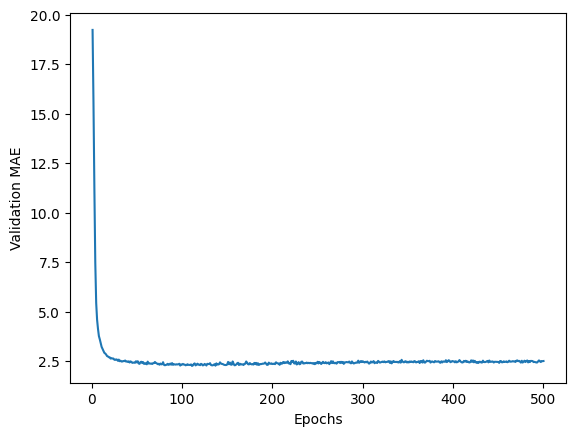

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

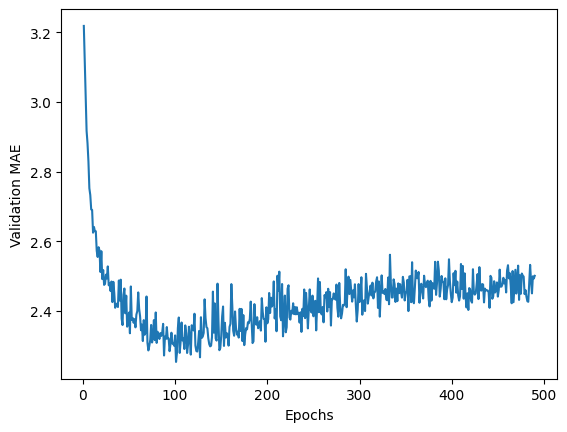

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 6ms/step - loss: 18.2624 - mae: 2.8834


In [ ]:
test_mae_score

2.8834056854248047

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([7.6961155], dtype=float32)

In [ ]:
test_targets[0]

7.2

In [ ]:
predictions[100]

array([28.539656], dtype=float32)

In [ ]:
test_targets[100]

26.7

##Working with BBC Dataset, NOT available with Keras##

**Load the dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_dir = '/content/drive/My Drive/datasets/bbc/'

In [3]:
import os
os.listdir(data_dir)

['README.TXT', 'politics', 'entertainment', 'sport', 'tech', 'business']

In [ ]:
import pandas as pd
folders = ["business","entertainment","politics","sport","tech"]

os.chdir(data_dir)

f_text = []
f_cat = []

for i in folders:
    files = os.listdir(i)
    for text_file in files:
        file_path = i + "/" +text_file
        #print ("reading file:", file_path)
        with open(file_path,encoding = 'unicode_escape') as f:
            data = f.readlines()
        data = ' '.join(data)
        f_text.append(data)
        f_cat.append(i)

data = {'news': f_text, 'category': f_cat}
df = pd.DataFrame(data)

In [ ]:
df.head(100)

,news,category
0,US interest rate rise expected\n \n US interes...,business
1,Ask Jeeves tips online ad revival\n \n Ask Jee...,business
2,UK economy facing 'major risks'\n \n The UK ma...,business
3,Share boost for feud-hit Reliance\n \n The boa...,business
4,US firm pulls out of Iraq\n \n A US company ha...,business
...,...,...
95,EU ministers to mull jet fuel tax\n \n Europea...,business
96,$1m payoff for former Shell boss\n \n Shell is...,business
97,IMF agrees fresh Turkey funding\n \n Turkey ha...,business
98,MG Rover China tie-up 'delayed'\n \n MG Rover'...,business


In [ ]:
df.groupby('category').category.count()

,category
category,
business,510
entertainment,386
politics,417
sport,511
tech,401


In [ ]:
bus = df[df['category'] == 'business']
ent = df[df['category'] == 'entertainment']
plt = df[df['category'] == 'politics']
spt = df[df['category'] == 'sport']
tech = df[df['category'] == 'tech']

In [ ]:
slices = [bus[:200], ent[:200],plt[:200],spt[:200],tech[:200]]

In [ ]:
slices

[                                                  news  category
 0    US interest rate rise expected\n \n US interes...  business
 1    Ask Jeeves tips online ad revival\n \n Ask Jee...  business
 2    UK economy facing 'major risks'\n \n The UK ma...  business
 3    Share boost for feud-hit Reliance\n \n The boa...  business
 4    US firm pulls out of Iraq\n \n A US company ha...  business
 ..                                                 ...       ...
 195  Bombardier chief to leave company\n \n Shares ...  business
 196  Gold falls on IMF sale concerns\n \n The price...  business
 197  French wine gets 70m euro top-up\n \n The Fren...  business
 198  Crossrail link 'to get go-ahead'\n \n The Â£10...  business
 199  South African car demand surges\n \n Car manuf...  business
 
 [200 rows x 2 columns],
                                                   news       category
 510  Spirit awards hail Sideways\n \n The comedy Si...  entertainment
 511  Triple triumph for Little Britain

In [ ]:
train_ds = df

In [ ]:
train_ds.shape

(2225, 2)

In [ ]:
train_ds

,news,category
0,US interest rate rise expected\n \n US interes...,business
1,Ask Jeeves tips online ad revival\n \n Ask Jee...,business
2,UK economy facing 'major risks'\n \n The UK ma...,business
3,Share boost for feud-hit Reliance\n \n The boa...,business
4,US firm pulls out of Iraq\n \n A US company ha...,business
...,...,...
2220,What high-definition will do to DVDs\n \n Firs...,tech
2221,Iran jails blogger for 14 years\n \n An Irania...,tech
2222,Microsoft gets the blogging bug\n \n Software ...,tech
2223,Games firms 'face tough future'\n \n UK video ...,tech


In [ ]:
#train_ds = pd.concat(slices)

In [ ]:
#train_ds.shape

In [ ]:
#train_ds

,news,category
0,US interest rate rise expected\n \n US interes...,business
1,Ask Jeeves tips online ad revival\n \n Ask Jee...,business
2,UK economy facing 'major risks'\n \n The UK ma...,business
3,Ailing EuroDisney vows turnaround\n \n EuroDis...,business
4,Ethiopia's crop production up 24%\n \n Ethiopi...,business
...,...,...
2019,Web radio takes Spanish rap global\n \n Spin t...,tech
2020,What's next for next-gen consoles?\n \n The ne...,tech
2021,Hollywood to sue net film pirates\n \n The US ...,tech
2022,"Cebit opens to mobile music tune\n \n Cebit, t...",tech


In [ ]:
train_ds.groupby('category').category.count()

,category
category,
business,510
entertainment,386
politics,417
sport,511
tech,401


In [ ]:
pip install Keras-Preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00


In [ ]:
pip install keras==2.13.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires keras>=3.2.0, but you have keras 2.13.1 which is incompatible.


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.preprocessing.text import Tokenizer

In [ ]:
maxlen = 250
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)

In [ ]:
# training data preparation
tokenizer.fit_on_texts(train_ds['news'])
sequences = tokenizer.texts_to_sequences(train_ds['news'])
word_index = tokenizer.word_index
#print('Found %s unique tokens.' % len(word_index))
X = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
X.shape

(1000, 250)

In [ ]:
word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'in': 6,
 'for': 7,
 'is': 8,
 'that': 9,
 'on': 10,
 'said': 11,
 'it': 12,
 'was': 13,
 'he': 14,
 'be': 15,
 'with': 16,
 'as': 17,
 'has': 18,
 'have': 19,
 'at': 20,
 'are': 21,
 'but': 22,
 'by': 23,
 'will': 24,
 'from': 25,
 'not': 26,
 'his': 27,
 'mr': 28,
 'they': 29,
 'i': 30,
 'this': 31,
 'an': 32,
 'we': 33,
 'would': 34,
 'which': 35,
 'had': 36,
 'been': 37,
 'more': 38,
 'their': 39,
 'up': 40,
 'its': 41,
 'were': 42,
 'who': 43,
 'also': 44,
 'people': 45,
 'year': 46,
 'new': 47,
 'one': 48,
 'about': 49,
 'out': 50,
 'there': 51,
 'us': 52,
 'than': 53,
 'after': 54,
 'or': 55,
 'could': 56,
 'all': 57,
 'can': 58,
 'if': 59,
 'you': 60,
 'over': 61,
 'first': 62,
 'last': 63,
 'time': 64,
 'when': 65,
 'two': 66,
 'other': 67,
 'now': 68,
 'so': 69,
 'some': 70,
 'into': 71,
 'what': 72,
 'she': 73,
 'music': 74,
 'film': 75,
 'no': 76,
 'government': 77,
 'world': 78,
 'best': 79,
 'being': 80,
 'uk': 81,
 'mak

In [ ]:
#Convert categorical variable into dummy/indicator variables.
Y = pd.get_dummies(train_ds['category']).values
Y.shape

(1000, 5)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(800, 250)

In [ ]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,  513,    2, 1415, 1686,  659,    1, 7114,
        534, 4542, 5002,    8, 2340,   10,    1,   77,    2, 8352,  560,
       2341,    6, 1686,  223,   23, 6218,    1,  237,   12, 1291,  217,
          1, 5002,   11,    6,   41, 7115,  114,    1,  400,    9,  278,
          8,  490,   93,    3, 8353,  104,  659,  366,   25,    1,  941,
         61,    1,   63,   46,   12,  732,    7,  288, 1970, 1416, 1182,
       6202,    4, 3061, 5560,    1, 2662, 2342, 7115,   44, 8354,    1,
         77,    2, 5561,  380,   67,  163,  458,  752,    2,  184, 5002,
        281,  381, 8355,  230,    7,    5, 3227,   

In [ ]:
from keras.layers import Dropout
embedding_dim = 100
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 25000)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                800032    
                                                                 
 dense_4 (Dense)             (None, 5)                 165       
                                                                 
Total params: 1800197 (6.87 MB)
Trainable params: 1800197 (6.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train,y_train,
                    epochs=20,
                    batch_size=16,validation_split=0.1)

Epoch 1/20
45/45 [==============================] - 7s 130ms/step - loss: 1.5236 - acc: 0.3042 - val_loss: 1.3260 - val_acc: 0.5125
Epoch 2/20
45/45 [==============================] - 5s 99ms/step - loss: 0.5075 - acc: 0.9597 - val_loss: 0.8893 - val_acc: 0.6875
Epoch 3/20
45/45 [==============================] - 3s 66ms/step - loss: 0.0406 - acc: 0.9986 - val_loss: 0.7145 - val_acc: 0.8000
Epoch 4/20
45/45 [==============================] - 2s 48ms/step - loss: 0.0069 - acc: 1.0000 - val_loss: 0.6371 - val_acc: 0.7750
Epoch 5/20
45/45 [==============================] - 2s 38ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.6301 - val_acc: 0.7750
Epoch 6/20
45/45 [==============================] - 2s 44ms/step - loss: 8.9743e-04 - acc: 1.0000 - val_loss: 0.6237 - val_acc: 0.7625
Epoch 7/20
45/45 [==============================] - 2s 46ms/step - loss: 4.9817e-04 - acc: 1.0000 - val_loss: 0.6215 - val_acc: 0.7875
Epoch 8/20
45/45 [==============================] - 2s 42ms/step - loss: 3

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train,y_train,
                    epochs=20,
                    batch_size=16,validation_split=0.1)

Epoch 1/20
45/45 [==============================] - 3s 56ms/step - loss: 5.0915e-05 - acc: 1.0000 - val_loss: 0.6521 - val_acc: 0.7875
Epoch 2/20
45/45 [==============================] - 3s 68ms/step - loss: 4.7696e-05 - acc: 1.0000 - val_loss: 0.6528 - val_acc: 0.7875
Epoch 3/20
45/45 [==============================] - 2s 46ms/step - loss: 4.4789e-05 - acc: 1.0000 - val_loss: 0.6540 - val_acc: 0.7750
Epoch 4/20
45/45 [==============================] - 2s 46ms/step - loss: 4.2194e-05 - acc: 1.0000 - val_loss: 0.6549 - val_acc: 0.7750
Epoch 5/20
45/45 [==============================] - 1s 25ms/step - loss: 3.9898e-05 - acc: 1.0000 - val_loss: 0.6556 - val_acc: 0.7750
Epoch 6/20
45/45 [==============================] - 1s 31ms/step - loss: 3.7810e-05 - acc: 1.0000 - val_loss: 0.6566 - val_acc: 0.7750
Epoch 7/20
45/45 [==============================] - 1s 16ms/step - loss: 3.5929e-05 - acc: 1.0000 - val_loss: 0.6571 - val_acc: 0.7750
Epoch 8/20
45/45 [==============================] - 0s 

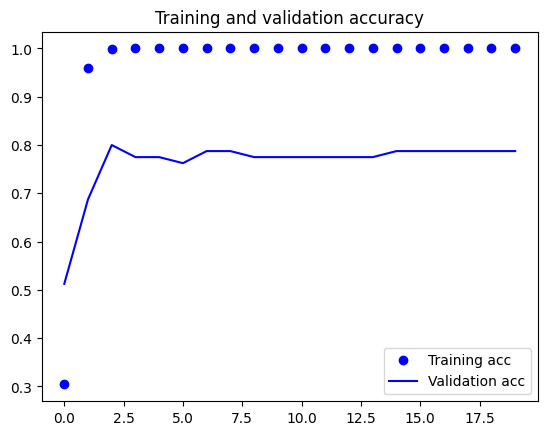

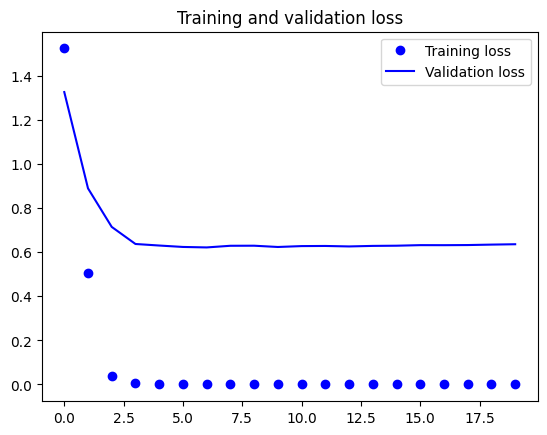

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.8626 - acc: 0.7050


[0.8625864386558533, 0.7049999833106995]

### Wrapping up

## Summary